In [25]:
import sys
print(sys.executable)
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns

import lifelines
from lifelines.datasets import load_waltons
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times

from sklearn.manifold import TSNE
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

from collections import Counter
from lifelines import CoxPHFitter


D:\software\Miniconda\miniConda\envs\plot\python.exe


In [2]:
import time
import warnings

import numpy as np


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import scipy.stats as stats    #stats.ttest_ind(a=group1, b=group2, equal_var=True)

from itertools import combinations
from scipy import stats
from scipy.stats import mannwhitneyu

from scipy.stats import levene

In [3]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans

In [4]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def make_path(path):
    if not os.path.exists(path):
        os.makedirs(path)
        
def delet_miss_in_clinical(sub_cf,clinical_df=clinical_df):
    '''删除子类中不存在于clinical数据的病例，并且返回存在于clinical数据的病例信息临床信息，print.clinical_df
    '''
    judge_F = sub_cf.index.isin(clinical_df.index)

    if np.sum(judge_F==0)>0:   #0为False ,1为Ture

        missing_patient = sub_cf[~judge_F].index.tolist()
        sub_cf = sub_cf[judge_F]     # 这个顺序要在前一行之后
        print(f'The following patients were missing in original clinical data:{missing_patient}')
        print(f'Now,There are {len(sub_cf)} sample ')

    sub_clinical = clinical_df.loc[sub_cf.index,:]   #如果不加前面的筛选，会把所有不存在于clinical_df的index返回，并报错
    if sub_clinical['vital_status'].isnull().any():
        number = sub_clinical['vital_status'].isnull().sum()
        sub_clinical.dropna(axis=0,subset=["vital_status"],inplace=True)     # axis=0 按行删除
        print(f'There were {number} na in vital_status colunm and were deleted.')
        print(f'Now,There are {len(sub_clinical)} id in cluster ')
    if sub_clinical['min(T,C)'].isnull().any():
        number = sub_clinical['min(T,C)'].isnull().sum()
        sub_clinical.dropna(axis=0,subset=["min(T,C)"],inplace=True)
        print(f'There were {number} na in min(T,C) colunm and were deleted.')
        print(f'Now,There are {len(sub_clinical)} id in cluster')
    if sub_clinical['vital_status'].isin(['Not Reported']).any():
        number = sub_clinical['vital_status'].isin(['Not Reported']).sum()
        sub_clinical =sub_clinical[~sub_clinical['vital_status'].isin(['Not Reported'])] 
        print(f'There were {number} str of Not Reported in vital_status colunm and were deleted.')
        print(f'Now,There are {len(sub_clinical)} id in cluster')

    return sub_clinical

def componential_plot_static_3d(reduced_data, labels, pc, variable,variance,save_path):
    """draw a static componential plot in 3d for three principle components
    
    :param reduced_data: data processed by PCA
    :param labels: labels of original dataset 
    :param pc: all the principle components
    :param variable: the name of the variables of the data set
    """

    fig = plt.figure(1, figsize=(14, 12))    ##恢复
    ax = plt.axes(projection='3d')   #恢复
    
    legend = []  # 
    classes = np.unique(labels)  # label type
    n = pc.shape[1]
    # colors = ['g', 'r', 'y']
    # markers = ['o', '^', 'x']
    
    x = reduced_data.loc[:, 0]  # variable contributions for PC1
    y = reduced_data.loc[:, 1]  # variable contributions for PC2 
    z = reduced_data.loc[:, 2]  # variable contributions for PC3
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    scalez = 1.0/(z.max() - z.min())
    
    # Draw a data point projection plot that is projected to 
    # a three-dimensional space using normal PCA
    for i, label in enumerate(classes):
        ax.scatter3D(x[labels==label] * scalex,
                     y[labels==label] * scaley,
                     z[labels==label] * scalez,
                     linewidth=0.01) 
        # hyperparameter in plt.scatter(): c=colors[i], marker=markers[i]
        legend.append("Label: {}".format(label))
    
    ax.legend(legend)
    
    # the initial angle to draw the 3d plot
    azim = -60  # azimuth
    elev = 30   # elevation
    ax.view_init(elev, azim)  # set the angles
    
    # plot arrows as the variable contribution,
    # each variable has a score for PC1, for PC2 and for PC3 respectively
    for i in range(n):
        ax.quiver(0, 0, 0, pc[0, i], pc[1, i], pc[2, i], color='k', alpha=0.7,
                  linewidth=1, arrow_length_ratio=0.05)
        ax.text(pc[0, i]*1.1, pc[1, i]*1.1, pc[2, i]*1.1, variable[i],
                ha='left', va='baseline', color='k', fontsize=12)
        
    ax.set_xlabel(f"$PC1$ ({np.round(variance[0]*100,2)}%)")
    ax.set_ylabel(f"$PC2$ ({np.round(variance[1]*100,2)}%)")
    ax.set_zlabel(f"$PC3$ ({np.round(variance[2]*100)}%)")
    plt.title("Componential Plot in 3 Dimension")
    plt.tight_layout()
    plt.ylabel('')
    plt.xlabel('')
    plt.grid()
#     plt.gcf().subplots_adjust(left=0.05,top=0.91,bottom=0.09,right=0.95)
    plt.tight_layout()

    plt.savefig(save_path,bbox_inches = 'tight')
    plt.close()
#     save_fig("Componential_Plot_in_3_Dimension")

def cumsum_variance(data,save_path):
    #data : original data with 16 celltype
    pca2 = decomposition.PCA()
    pca2.fit(data)
    # variance interpretation proportion on each principal component axis
    pca2.explained_variance_ratio_
    cumsum = np.cumsum(pca2.explained_variance_ratio_)
    plt.figure(figsize=(6,4))
    plt.plot(cumsum, linewidth=3)
    plt.xlabel("Dimensions")
    plt.ylabel("Explained Variance")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path,bbox_inches = 'tight')
    plt.close()
    # save_fig("explained_variance_plot")
    



    

def boxplot_pca_values(X_PCA_data,labels,cancer_type,n_pc,save_path):
    if n_pc==3:
        X_PCA_data.columns = ['PC1','PC2','PC3']
        X_PCA_data['labels']=labels
        aa1 = X_PCA_data[['PC1','labels']]
        aa1['PCs'] = 'PC1'
        aa1.columns =['pc_value','labels','PCs']

        aa2 = X_PCA_data[['PC2','labels']]
        aa2['PCs'] = 'PC2'
        aa2.columns =['pc_value','labels','PCs']

        aa3 = X_PCA_data[['PC3','labels']]
        aa3['PCs'] = 'PC3'
        aa3.columns =['pc_value','labels','PCs']
        aa = pd.concat([aa1,aa2,aa3],axis=0)
    if n_pc==2:
        X_PCA_data.columns = ['PC1','PC2']
        X_PCA_data['labels']=labels
        aa1 = X_PCA_data[['PC1','labels']]
        aa1['PCs'] = 'PC1'
        aa1.columns =['pc_value','labels','PCs']

        aa2 = X_PCA_data[['PC2','labels']]
        aa2['PCs'] = 'PC2'
        aa2.columns =['pc_value','labels','PCs']
        aa = pd.concat([aa1,aa2],axis=0)
    
    
    plt.figure(figsize=(8,8))
    sns.boxplot(x = 'PCs', y = 'pc_value', data = aa, hue = 'labels')
    plt.title(f'PCA values of {cancer_type}',fontsize=8)
    plt.legend(frameon=False,title='labels')   #loc='upper right'   fontsize=6,handlelength=0.5,loc='best'
    plt.xticks(rotation=45)
    plt.savefig(save_path,bbox_inches = 'tight')
    plt.close()    




    


def cancer_type_visual_3d(dataset_name,ori_datasets=ori_datasets):
    
    X = ori_datasets[dataset_name]     #  ori_datasets   my_datasets
    #pca 降维到3维
    X_PCA = decomposition.PCA(n_components=3)
    X_PCA_data = X_PCA.fit_transform(X)
    
    #聚类
    #kmeans
    kmeans = MiniBatchKMeans(n_clusters=3,
                              random_state=0,
                              batch_size=6,
                              max_iter=10
                              ).fit(X_PCA_data)
    
    X_PCA_data = pd.DataFrame(X_PCA_data,index= X.index)
    labels = kmeans.labels_
    variance = X_PCA.explained_variance_ratio_
    X_PCA_data['labels'] = labels
    fig = px.scatter_3d(
      X_PCA_data,
      x=0,
      y=1,
      z=2,
      color="labels",
      size_max=0.1
    )
    fig.update_layout(scene = dict(
                        xaxis_title=f"PC1 ({np.round(variance[0]*100,2)}%)",
                        yaxis_title=f"PC2 ({np.round(variance[1]*100,2)}%)",
                        zaxis_title=f"PC3 ({np.round(variance[2]*100),2}%)"),
                        width=700,
                        margin=dict(r=20, b=10, l=10, t=10))
    fig.show()
    
def loading_heatmap(all_loading,save_path):
    loading_heatmap_df = pd.DataFrame([])
    cancer_types = list(loading_['cancer type'].unique())
    count_ct = 0
    for cancer_type in cancer_types:
#         if count_ct==0:        
#             aa = loading_.loc[loading_['cancer type']==cancer_type,['PC1_scale','PC2_scale','PC3_scale','cell type']]   
#             aa = aa.set_index('cell type')
#             aa.rename(columns= {'PC1_scale': f'PC1_scale_{cancer_type}', 'PC2_scale': f'PC2_scale_{cancer_type}','PC3_scale': f'PC3_scale_{cancer_type}'}, inplace=True)
#         else:
#             aa1 = loading_.loc[loading_['cancer type']==cancer_type,['PC1_scale','PC2_scale','PC3_scale','cell type']]
#             aa1 = aa1.set_index('cell type')
#             aa1.rename(columns= {'PC1_scale': f'PC1_scale_{cancer_type}', 'PC2_scale': f'PC2_scale_{cancer_type}','PC3_scale': f'PC3_scale_{cancer_type}'}, inplace=True)
#             aa = aa1.merge(aa,left_index=True,right_index=True)
        if count_ct==0:        
            aa = loading_.loc[loading_['cancer type']==cancer_type,['PC1','PC2','PC3','cell type']]   
            aa = aa.set_index('cell type')
            aa.rename(columns= {'PC1': f'PC1_{cancer_type}', 'PC2': f'PC2_{cancer_type}','PC3': f'PC3_{cancer_type}'}, inplace=True)
        else:
            aa1 = loading_.loc[loading_['cancer type']==cancer_type,['PC1','PC2','PC3','cell type']]
            aa1 = aa1.set_index('cell type')
            aa1.rename(columns= {'PC1': f'PC1_{cancer_type}', 'PC2': f'PC2_{cancer_type}','PC3': f'PC3_{cancer_type}'}, inplace=True)
            aa = aa1.merge(aa,left_index=True,right_index=True)
        count_ct+=1
    aa=aa.T
#     plt.figure(figsize=(8,20))
    sns.set(font_scale=1)
    sns.clustermap(data=aa,figsize=(10,20) )#仅仅需传入绘图数据集
    plt.yticks(fontsize=3)
    plt.savefig(save_path)
    
from matplotlib.pylab import mpl
def set_fig_style(font_family=None, font_size=None):
    # set_fig_style(font_family='Arial', font_size=8)
    fig, ax = plt.subplots()
    
    try:
        sns.set_style("white")
        plt.style.use(['science','no-latex'])
    except:
        print('No science style')      
        sns.set(palette='muted', font_scale=1.5)
        
    mpl.rcParams['figure.dpi'] = 300
    mpl.rcParams['figure.facecolor'] = 'white'
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    if font_family:
        mpl.rcParams['font.family'] = font_family
    if font_size:
        mpl.rcParams['font.size'] = font_size  
    # print('figure.dpi will be set to', mpl.rcParams['figure.dpi'])
    plt.close('all')



#2pca
def loadings_bar_2pca(loading,cancer_type,n_PC=2,save_path=None,ax=None,pintu=False,save=True):
    #loading:the dataframe ,PCA.components_.T
    if pintu:
        plt.sca(ax)
    else:
        plt.figure(figsize=(6,4))
    if n_PC==2:
        aa1 = loading[['PC1','cell type']]
        aa1['n_pc'] = 'PC1'
        aa1.columns =['loading','cell type','n_pc']

        aa2 = loading[['PC2','cell type']]
        aa2['n_pc'] = 'PC2'
        aa2.columns =['loading','cell type','n_pc']

    #     aa3 = loading[['PC3','cell type']]
    #     aa3['n_pc'] = 'PC3'
    #     aa3.columns =['loading','cell type','n_pc']
        aa = pd.concat([aa1,aa2],axis=0)
    if n_PC==3:
        aa1 = loading[['PC1','cell type']]
        aa1['n_pc'] = 'PC1'
        aa1.columns =['loading','cell type','n_pc']

        aa2 = loading[['PC2','cell type']]
        aa2['n_pc'] = 'PC2'
        aa2.columns =['loading','cell type','n_pc']

        aa3 = loading[['PC3','cell type']]
        aa3['n_pc'] = 'PC3'
        aa3.columns =['loading','cell type','n_pc']
        aa = pd.concat([aa1,aa2,aa3],axis=0)
        
    sns.barplot(x = 'cell type', y = 'loading', data = aa, hue = 'n_pc')
    plt.title(f'PCA loadings of {cancer_type}',fontsize=8)
    plt.legend(frameon=False,fontsize=6)   #loc='upper right'   fontsize=6,handlelength=0.5,loc='best'
    plt.yticks(fontsize=6)
    plt.xticks(rotation=60,fontsize=6,horizontalalignment='right',va='center_baseline')
    plt.xlabel("Cell types",fontsize=8)
    plt.ylabel("PCA loadings",fontsize=8)
    if save:
        plt.savefig(save_path,bbox_inches = 'tight')
        plt.close()

def biplot(reduced_data, labels, pc, variable,variance,cancertype,ax=None,pintu=False,save_path=None,save=True,):
    """plot componential biplot for two principle components
    
    :param reduced_data: data processed by PCA
    :param labels: labels of original dataset 
    :param pc: all the principle components
    :param variable: the name of the variables of the data set
    """
    if pintu:
        plt.sca(ax)
    else:
        plt.figure(1, figsize=(6, 6))
    
    legend = []  # 
    classes = np.unique(labels)  # label type
    n = pc.shape[1]
    # colors = ['g', 'r', 'y']
    # markers = ['o', '^', 'x']
    
    x = reduced_data.loc[:, 0]  # variable contributions for PC1
    y = reduced_data.loc[:, 1]  # variable contributions for PC2
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    
    # Draw a data point projection plot that is projected to 
    # a two-dimensional plane using normal PCA
    for i, label in enumerate(classes):
        plt.scatter(x[labels==label] * scalex,
                    y[labels==label] * scaley,
                    s=2) #linewidth=0.001
        # hyperparameter in plt.scatter(): c=colors[i], marker=markers[i]
        legend.append("c{}".format(label))

     
    plt.legend(legend,frameon=False,fontsize=6)
    
    # plot arrows as the variable contribution,
    # each variable has a score for PC1 and for PC2 respectively
    for i in range(n):
        if (pc[0, i]<0.1)&(pc[1, i]<0.1):
            pass
        else:
            plt.arrow(0, 0, pc[0, i], pc[1, i], color='k', alpha=0.7,
                      linewidth=0.8, )
            plt.text(pc[0, i]*1.01, pc[1, i]*1.01, variable[i],
                     ha='center', va='center', color='k', fontsize=6)
        
    plt.xlabel(f"PC1 ({np.round(variance[0]*100,2)}%)",fontsize=8)
    plt.ylabel(f"PC2 ({np.round(variance[1]*100,2)}%)",fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f"{cancertype}",fontsize=8)
#     plt.grid()
    plt.tight_layout()
    if save:
        plt.savefig(save_path,bbox_inches = 'tight')
        plt.close()

        
######3pca
def boxplot_cellfracton(data,labels,cancer_type,ax=None,pintu=False,save_path=None,save=True):
    X1= data.copy()
    X1['labels']=list(str('c')+pd.Series(labels).astype('str'))
    count=0
#     print('boxplot_cellfracton()________________________________________________________________________________')
    
    cell_types = list(X1.columns.copy())
#     print(cell_types)
    cell_types.remove('labels')
#     print(cell_types)
    for i in cell_types:


        aa1 = X1[[i,'labels']]
        aa1['Cell type'] = i
        aa1.columns =['Cell fraction','labels','Cell type']
        aa1.sort_values(by="labels" , inplace=True, ascending=True)
        if count==0:
            aa=aa1
            
        else:
            aa = pd.concat([aa,aa1],axis=0)
        count+=1
    if pintu:
        plt.sca(ax)
    else:
        plt.figure(figsize=(8,6))
    
    sns.boxplot(x = 'Cell type', y = 'Cell fraction', data = aa, hue = 'labels',showfliers=False,linewidth=0.5)
    plt.title(f'Cell fraction of {cancer_type} clusters',fontsize=8)
    plt.legend(frameon=False,fontsize=6)   #loc='upper right'   fontsize=6,handlelength=0.5,loc='best'
    plt.xticks(rotation=60,fontsize=6,horizontalalignment='right',va='center_baseline')
    plt.yticks(fontsize=6)
    plt.xlabel('Cell types',fontsize=8)
    plt.ylabel('Cell fraction',fontsize=8)
    if save:
        plt.savefig(save_path,bbox_inches = 'tight')
        plt.close()  

    


## Select cancer type from TCGA for futhter analysis

#### Select cancer type which thePearson correlation coefficients (r) between the DeSide-predicted tumor purity and CPE values are greater than 0.6 and the RMSEs are less than 0.15.


In [6]:
beter_pre = "HNSC,ACC,LUAD,CESC,UCEC,LIHC,KICH,PRAD,READ,GBM,KIRC,LGG,THCA,LUSC,BRCA,BLCA,PAAD,COAD,KIRP"
beter_pre_list = beter_pre.split(',')   #"\\" 表示的是\


### Read the DeSide-predicted results

In [7]:

my_datasets ={}
t_sne_datasets = {}
ori_datasets ={}
# new_deside_data_path = r'D:\EMT\EMT\data\xiongxin_raw_data_0914\2023_\TCGA_all_predicted_cell_fraction_by_DeSide_20230216_009_0_0.csv'
new_deside_data_path = r'.//data//all_predicted_cell_fraction_by_DeSide_20231110_02_D1+D2.csv'
new_deside_data_path = r'D:\EMT\EMT\data\xiongxin_raw_data_0914\2023_\all_predicted_cell_fraction_by_DeSide_20231110_02_D1+D2.csv'

new_deside_data = pd.read_csv(new_deside_data_path,index_col='sample_id')
new_deside_data.index = new_deside_data.index.str.rsplit('-',n=1).str[0]    # change index, for example: change "TCGA-C4-A0F1-01A" to "TCGA-C4-A0F1"    
new_deside_data  = new_deside_data.loc[:,['cancer_type','Plasma B cells','Non-plasma B cells','CD4 T','CD8 T effector','CD8 T (GZMK high)','Double-neg-like T','Cancer Cells','DC','Endothelial Cells','CAFs','Myofibroblasts','Macrophages','Mast Cells','NK','Neutrophils','Monocytes'
]]
# new_deside_data['B Cells'] = new_deside_data['Plasma B cells']+new_deside_data['Non-plasma B cells']
# new_deside_data['CD8 T'] =new_deside_data['CD8 T effector']+new_deside_data['CD8 T (GZMK high)']
# new_deside_data['Fibroblasts'] =new_deside_data['CAFs']+new_deside_data['Myofibroblasts']

new_deside_data = new_deside_data.drop(['Cancer Cells'], axis=1)
# new_deside_data = new_deside_data.drop(['Plasma B cells', 'Non-plasma B cells','CD8 T effector','CD8 T (GZMK high)','CAFs','Myofibroblasts'], axis=1)
# new_deside_data = new_deside_data.drop(['Cancer Cells','Plasma B cells', 'Non-plasma B cells','CD8 T effector','CD8 T (GZMK high)','CAFs','Myofibroblasts'], axis=1)

####

###############
# new_deside_data['T Cells'] =new_deside_data['CD8 T']+new_deside_data['CD4 T']+ new_deside_data['Double-neg-like T']   #1207
# new_deside_data['Lymphocytes'] =  new_deside_data['B Cells']+new_deside_data['T Cells']+new_deside_data['NK']
# new_deside_data['Monocytic_cells']= new_deside_data['Monocytes']+new_deside_data['Macrophages']+new_deside_data['DC']   #https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0059243&type=printable
# new_deside_data['Stromal_cells'] = new_deside_data['Fibroblasts']+new_deside_data['Endothelial Cells']


for i in beter_pre_list:
    cf_new = new_deside_data.loc[new_deside_data['cancer_type']==i,:]
    cf_new = cf_new.drop('cancer_type',axis=1,inplace=False)
    print(i,'----------------')
    print('The number of duplicate samples: ',cf_new.index.duplicated().sum())
    print('Duplicate samples id:',cf_new.index[cf_new.index.duplicated(keep='first') ])
    cf_new = cf_new[~cf_new.index.duplicated(keep='first')]    #删去重复值
    print('The number of samples after deleting the duplicated id: ',len(cf_new))
    ori_datasets[i] = cf_new
    cf_ = MinMaxScaler().fit_transform(cf_new)
    cf_ = pd.DataFrame(cf_,columns= cf_new.columns,index= cf_new.index)
    my_datasets[i] = cf_
    
#     X_embedded_i = TSNE(n_components=2).fit_transform(cf_)
#     X_embedded_i = pd.DataFrame(X_embedded_i,index= cf_new.index)
#     t_sne_datasets[i] = X_embedded_i

HNSC ----------------
The number of duplicate samples:  0
Duplicate samples id: Index([], dtype='object', name='sample_id')
The number of samples after deleting the duplicated id:  500
ACC ----------------
The number of duplicate samples:  0
Duplicate samples id: Index([], dtype='object', name='sample_id')
The number of samples after deleting the duplicated id:  79
LUAD ----------------
The number of duplicate samples:  2
Duplicate samples id: Index(['TCGA-44-4112', 'TCGA-44-3917'], dtype='object', name='sample_id')
The number of samples after deleting the duplicated id:  513
CESC ----------------
The number of duplicate samples:  0
Duplicate samples id: Index([], dtype='object', name='sample_id')
The number of samples after deleting the duplicated id:  304
UCEC ----------------
The number of duplicate samples:  4
Duplicate samples id: Index(['TCGA-BK-A0CC', 'TCGA-BK-A26L', 'TCGA-BK-A0CA', 'TCGA-BK-A139'], dtype='object', name='sample_id')
The number of samples after deleting the dupli

### Read the survival data of 22 cancer types

In [9]:
#Dealing with input data for survival analysis, including 22 types of cancer.
# https://www.jianshu.com/p/f18f846ca602
#  For deceased samples, the "min(T,C)" column follows the "days_to_death".
# For surviving samples, the "min(T,C)" column follows the "days to last follow-up".
# Read the survival data download from https://portal.gdc.cancer.gov/repository
clinical_path = r'D:\EMT\EMT\data\xiongxin_raw_data_0914\2022\clinical_data\original_download\22_cancer_type\clinical.cases_selection.2023-03-23\clinical.csv'

clinical_df = pd.read_csv(clinical_path,index_col='case_submitter_id')
clinical_df = clinical_df[['days_to_death','vital_status','days_to_last_follow_up']]
clinical_df.replace("'--", np.NaN, inplace=True)
clinical_df['days_to_death'] = clinical_df['days_to_death'].astype('float64') 
clinical_df['days_to_last_follow_up'] = clinical_df['days_to_last_follow_up'].astype('float64') 
clinical_df = clinical_df[~clinical_df.index.duplicated(keep='first')]       # Delete the duplicated ID
print('The number of duplicate samples: ',clinical_df.index.duplicated().sum())



clinical_df.loc[clinical_df['vital_status']=='Alive','min(T,C)']=clinical_df['days_to_last_follow_up']  #
clinical_df.loc[clinical_df['vital_status']=='Dead','min(T,C)']=clinical_df['days_to_death']   #
clinical_df['vital_status'] = clinical_df['vital_status'].replace('Alive', 0)    # The statu of Alive is 0
clinical_df['vital_status'] = clinical_df['vital_status'].replace('Dead', 1)     # The statu of Dead is 1
print("The number of instances where the 'vital_status' column is marked as 'Not Reported' ：",clinical_df['vital_status'].isin(['Not Reported']).sum())
clinical_df =clinical_df[~clinical_df['vital_status'].isin(['Not Reported'])]   #Delete samples where the "vital_status" column is marked as "Not Reported".
clinical_df.dropna(axis=0,subset=["vital_status"],inplace=True)     #Delete samples where the "vital_status" column is empty.
clinical_df.dropna(axis=0,subset=["min(T,C)"],inplace=True)       ##Delete samples where the "min(T,C)" column is empty.             

clinical_df.loc[clinical_df.index,:]  
clinical_df = clinical_df.loc[clinical_df['min(T,C)']>=0,:]     
clinical_df = clinical_df.loc[clinical_df['min(T,C)']>0,:]    #Keep samples where the "min(T,C)" column is greater than 0.
#clinical_df['vital_status'].value_counts()   
#clinical_df.info()    
clinical_df      

The number of duplicate samples:  0
The number of instances where the 'vital_status' column is marked as 'Not Reported' ： 11


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (3,8,17,20,48,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,days_to_death,vital_status,days_to_last_follow_up,"min(T,C)"
case_submitter_id,,,,
TCGA-A7-A0DA,NaN,0,1085.0,1085.0
TCGA-BH-A0BD,NaN,0,554.0,554.0
TCGA-A8-A0AB,NaN,0,518.0,518.0
TCGA-B6-A1KC,NaN,0,1326.0,1326.0
TCGA-A8-A07I,NaN,0,426.0,426.0
...,...,...,...,...
TCGA-12-1089,177.0,1,177.0,177.0
TCGA-06-5411,254.0,1,254.0,254.0
TCGA-28-1753,NaN,0,37.0,37.0


# visual_3d

In [ ]:
cancer_type_visual_3d(dataset_name='KIRC',ori_datasets=ori_datasets)

In [ ]:
componential_plot_static_3d(X_PCA_data, labels, X_PCA.components_, variable,variance,save_path= save_path1)

In [ ]:
X_PCA_data['labels']=labels
X_PCA_data

# PCA(n_components=2)

In [17]:


def loading_heatmap_2d(all_loading,save_path):
    loading_heatmap_df = pd.DataFrame([])
    cancer_types = list(all_loading['cancer type'].unique())
    count_ct = 0
    for cancer_type in cancer_types:
#         if count_ct==0:        
#             aa = loading_.loc[loading_['cancer type']==cancer_type,['PC1_scale','PC2_scale','PC3_scale','cell type']]   
#             aa = aa.set_index('cell type')
#             aa.rename(columns= {'PC1_scale': f'PC1_scale_{cancer_type}', 'PC2_scale': f'PC2_scale_{cancer_type}','PC3_scale': f'PC3_scale_{cancer_type}'}, inplace=True)
#         else:
#             aa1 = loading_.loc[loading_['cancer type']==cancer_type,['PC1_scale','PC2_scale','PC3_scale','cell type']]
#             aa1 = aa1.set_index('cell type')
#             aa1.rename(columns= {'PC1_scale': f'PC1_scale_{cancer_type}', 'PC2_scale': f'PC2_scale_{cancer_type}','PC3_scale': f'PC3_scale_{cancer_type}'}, inplace=True)
#             aa = aa1.merge(aa,left_index=True,right_index=True)
        if count_ct==0:        
            aa = all_loading.loc[all_loading['cancer type']==cancer_type,['PC1','PC2','cell type']]   
            aa = aa.set_index('cell type')
            aa.rename(columns= {'PC1': f'PC1_{cancer_type}', 'PC2': f'PC2_{cancer_type}'},inplace=True)
        else:
            aa1 = all_loading.loc[all_loading['cancer type']==cancer_type,['PC1','PC2','cell type']]
            aa1 = aa1.set_index('cell type')
            aa1.rename(columns= {'PC1': f'PC1_{cancer_type}', 'PC2': f'PC2_{cancer_type}'}, inplace=True)
            aa = aa1.merge(aa,left_index=True,right_index=True)
        count_ct+=1
    aa=aa.T
#     plt.figure(figsize=(8,20))
    sns.set(font_scale=1)
    sns.clustermap(data=aa,figsize=(10,20) )#仅仅需传入绘图数据集
    plt.yticks(fontsize=3)
    plt.savefig(save_path)
    plt.close()

In [33]:
def pca2_ncluster(ncluster,dataset,n_PC,save_path):
    
    count_index=0
    count_double_p=0
    count_except = 0
    count_loadings=0
    p_df = pd.DataFrame([])
    significant_logrank_cox_p = pd.DataFrame([])
    variance_df = pd.DataFrame([])
    for dataset_name in beter_pre_list:
        out_p_list ={}  
        out_cox_p ={}
        out_HR = {}
#         save_path = r'.//results//PCA'
#         save_path = r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\all_results\2023\PCA_survival\1218_12celltype_scale_2pca_3cluster_minibatchkmeans'
        make_path(save_path)
        print(dataset_name,'********************************************')
        X = dataset[dataset_name]     #  ori_datasets   my_datasets
 
        X_PCA = decomposition.PCA(n_components=n_PC)
        X_PCA_data = X_PCA.fit_transform(X)

        #kmeans clustering
        kmeans = MiniBatchKMeans(n_clusters=ncluster,
                                  random_state=0,
                                  batch_size=6,
                                  max_iter=10
                                  ).fit(X_PCA_data)


        #PCA
        X_PCA_data = pd.DataFrame(X_PCA_data,index= X.index)
    #     X_PCA_data['label'] = kmeans.labels_
        #save loadings
        if n_PC ==2:
            loading = pd.DataFrame(X_PCA.components_.T, columns=['PC1', 'PC2'])

        if n_PC ==3:
            loading = pd.DataFrame(X_PCA.components_.T, columns=['PC1', 'PC2','PC3'])



        loading['cell type'] = X.columns
        loading['cancer type'] = dataset_name

        #plot barplot
        loading_fig_path = os.path.join(save_path,'loadings_fig')
        make_path(loading_fig_path)
        loading_bar_path = os.path.join(loading_fig_path,f'{dataset_name}_loading_bar.png')
        loadings_bar_2pca(n_PC=n_PC,loading = loading,cancer_type = dataset_name,save_path=loading_bar_path)
        #
        if count_loadings==0:
            loading_ = loading
        else:
            loading_ = pd.concat([loading_,loading],axis=0)

        #save variance_df(reduce the data to four dimensions) to check the variance of each PCs
        X_PCA_4 = decomposition.PCA(n_components=4)
        X_PCA_4_data = X_PCA_4.fit_transform(X)
#         X_PCA_4_df = pd.DataFrame(X_PCA_4_data,index= X.index)
        
        
        variance_df.loc[dataset_name,'PC1'] = X_PCA_4.explained_variance_ratio_[0]
        variance_df.loc[dataset_name,'PC2'] = X_PCA_4.explained_variance_ratio_[1]
        variance_df.loc[dataset_name,'PC3'] = X_PCA_4.explained_variance_ratio_[2]
        variance_df.loc[dataset_name,'PC4'] = X_PCA_4.explained_variance_ratio_[3]


        count_loadings+=1

         #pca
        labels = kmeans.labels_
        variable = cf_.columns
        variance = X_PCA.explained_variance_ratio_
        save_path0 = os.path.join(save_path,'pca_2d')
        make_path(save_path0)
        save_path1 = os.path.join(save_path0,f'{dataset_name}_2d.png')
        if n_PC==2:
            biplot( reduced_data= X_PCA_data, labels=labels, pc=X_PCA.components_, variable=variable,variance=variance,cancertype=dataset_name,save_path=save_path1)
        if n_PC==3:
            componential_plot_static_3d(X_PCA_data, labels, X_PCA.components_, variable,variance,save_path= save_path1)

        # Sum of Squared Errors (SSE) for different clustering numbers.
        save_path_SSE = os.path.join(save_path,'SSE_find_cluster_number')
        make_path(save_path_SSE)
        save_path_SSE = os.path.join(save_path_SSE,f'{dataset_name}.png')
        SSE_find_cluster_number(X_PCA_data=X_PCA_data,cancer_type=dataset_name,save_path=save_path_SSE)

        #pca_value
        save_path1 = os.path.join(save_path0,f'{dataset_name}_pca_values.png')
      
        boxplot_pca_values(X_PCA_data=X_PCA_data,labels=labels,cancer_type=dataset_name,n_pc=n_PC,save_path=save_path1)
        #pca_sum
        save_path1 = os.path.join(save_path0,f'{dataset_name}_variance.png')
        cumsum_variance(X,save_path= save_path1)
        ##cell proportions of each cluster. 
        save_path0 = os.path.join(save_path,'cell_fraction')
        make_path(save_path0)
        save_path0 = os.path.join(save_path0,f'{dataset_name}')
        boxplot_cellfracton(data=X,labels=labels,cancer_type=dataset_name,save_path=save_path0)
        #survival curve #############################
        zip_cluster={}
        for n in range(ncluster):
            cluster_n = X_PCA_data.loc[labels==n,:]
            cluster_n = delet_miss_in_clinical(cluster_n)
            cluster_name = 'c'+str(n)
            zip_cluster[cluster_name] = cluster_n
            
        list_vital_status=[]
        list_min_T_C=[]
        list_group=[]
        list_group_c =[]
        for n in range(ncluster): 
            cluster_name = 'c'+str(n)

            list_vital_status_n = list(zip_cluster[cluster_name]['vital_status'])
            list_vital_status = list_vital_status+list_vital_status_n
            list_min_T_C_n = list(zip_cluster[cluster_name]['min(T,C)'])
            list_min_T_C = list_min_T_C+list_min_T_C_n
            list_group_n1 = [cluster_name]*len(zip_cluster[cluster_name]['min(T,C)'])
            list_group = list_group+list_group_n1
            list_group_c_n = [n]*len(zip_cluster[cluster_name]['min(T,C)']) 
            list_group_c = list_group_c+list_group_c_n
            
        list_vital_status_array = np.array(list_vital_status)
        list_min_T_C_array = np.array(list_min_T_C)
        list_group_array = np.array(list_group)
        single_p = pd.DataFrame()
        list_cluster = list(zip_cluster.keys())   
        HR_com5 ={}

        com5=combinations(list_cluster, 2)
        for key_a,key_b in com5:   

            T1 = list_min_T_C_array[list_group_array==key_a]
            T2 = list_min_T_C_array[list_group_array==key_b]
            E1 = list_vital_status_array[list_group_array==key_a]
            E2 = list_vital_status_array[list_group_array==key_b]



            ######

            if (T1.shape[0]!=0)&(T2.shape[0]!=0):

                results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

                p_df.loc[str(count_index),'CancerType'] = dataset_name

                p_df.loc[str(count_index),key_a+'_'+key_b] = f"{results.p_value:.1E}"                            #np.round(results.p_value,5)
                #!!!!!!!!!!!!!!!!!!!!!!!
                #calc hr



                d_a = zip_cluster[key_a]
                d_b = zip_cluster[key_b]
                d_a['group']=2  # The experimental group is the numerator of the HR score.
                d_b['group']=1
                d_ab = pd.concat([d_a,d_b],axis=0,join='inner')
                d_ab = d_ab[['min(T,C)','vital_status','group']]
                try:
                    cph = CoxPHFitter()
                    cph.fit(d_ab, duration_col='min(T,C)', event_col ='vital_status')
                except:
                    count_except+=1
                    cph = CoxPHFitter(penalizer=0.1)
                    cph.fit(d_ab, duration_col='min(T,C)', event_col ='vital_status')                

                summary_  = cph.summary
                cox_p_lable = summary_['p'][0]  

                if cph.hazard_ratios_[0]<1:   #
                    hr_larger_than_1 = 1/cph.hazard_ratios_[0]
                    # if threshold_p:
                    #     info_df.loc[count_ct,'HR'] = hr_larger_than_1
                    #     info_df.loc[count_ct,'cox_p'] = cox_p_lable

                else:
                    hr_larger_than_1 = cph.hazard_ratios_[0]
                    # if threshold_p:
                    #     info_df.loc[count_ct,'HR'] =cph.hazard_ratios_[0]
                    #     info_df.loc[count_ct,'cox_p'] = cox_p_lable




                #!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                if (results.p_value<=0.05)&(cox_p_lable<=0.05):

                    count_double_p +=1
                    assemble = (key_a,key_b)
                    out_p_list[assemble]=np.round(results.p_value,2)
                    out_cox_p[assemble]=np.round(cox_p_lable,2)
                    out_HR[assemble]= np.round(hr_larger_than_1,1)
                    # out_p_list.append(assemble)
                    significant_logrank_cox_p.loc[count_double_p,'Cancer type']= dataset_name
    #                 significant_logrank_cox_p.loc[count_double_p,'Cell type']=ct_list[0]+'_'+ct_list[1]

                    significant_logrank_cox_p.loc[count_double_p,'subgroup']=key_a+'_'+key_b
                    significant_logrank_cox_p.loc[count_double_p,'logrank p']=results.p_value
                    significant_logrank_cox_p.loc[count_double_p,'HR']=hr_larger_than_1
                    significant_logrank_cox_p.loc[count_double_p,'cox_p']=cox_p_lable
                single_p.loc[str(key_a),str(key_b)] = results.p_value
            else:
                hr_larger_than_1 = float('-inf')
            HR_com5[key_a+'_'+key_b] = hr_larger_than_1

        hr_order1=sorted(HR_com5.items(),key=lambda x:x[1],reverse=False)
        hr_order = [i[0] for i in hr_order1]
        dict_hr =dict( zip(hr_order,range(1,4)))   #6 is the maximal ranking,1 is the smallest ranking

        try:
            for index_sig in significant_logrank_cox_p.loc[significant_logrank_cox_p['Cancer type']==dataset_name,'subgroup'].index:
                sig_ct = significant_logrank_cox_p.loc[index_sig,'subgroup']
                significant_logrank_cox_p.loc[index_sig,'ranking_HR']=dict_hr[sig_ct]
        except:
            pass


        set_fig_style(font_family='Arial', font_size=8)
        plt.figure(figsize=(8,8))
        for clu_name,clu_data in zip_cluster.items():
    #             print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',clu_data['min(T,C)'].shape[0])
            if (clu_data['min(T,C)'].shape[0]!=0)&(clu_data['vital_status'].shape[0]!=0):
                

                legend_label = f'{clu_name}'
                kmf = KaplanMeierFitter()
                kmf.fit(clu_data['min(T,C)'], clu_data['vital_status'], label=f"{legend_label} (n={len(clu_data['min(T,C)'])})")  #str(len(sub_clinical['min(T,C)'])) #data_race['min(T,C)'][[0,1,2,4]]   
                kmf.plot(ci_show=False,show_censors=True)  #_false_interval
                median_ = np.round((kmf.median_survival_time_)/30,2)     #Median survival time

    #             median_s_t.loc[dataset_name,clu_name] = median_  ######

                df_survival_function = kmf.survival_function_
    #             sub_median_data[clu_name] = median_
    #             sub_survival_function[clu_name] = df_survival_function
                plt.title(f'{dataset_name}')
                plt.ylabel('Survival probability')
                plt.xlabel('Overall survival(Days)')
                statistic_result = multivariate_logrank_test(list_min_T_C, list_group, list_vital_status)     
                p_value_= np.round(statistic_result.p_value,5)                 #general p

                p_df.loc[str(count_index),'general_p_value'] = p_value_

    #                 plt.text(
    #                         0.99,
    #                         0.01,
    #                         ("general Log-rank "+"$\it{p}$ = "+f"{p_value_}"),
    #                         transform=plt.gca().transAxes,
    #                         horizontalalignment="right",
    # #                         fontsize=15
    #                     )
                plt.text(
                    0.01,
                    0.31,
                    (f"overall_log_p:{p_value_}"),
                    transform=plt.gca().transAxes,
                    horizontalalignment="left",
                    fontsize=12
                )

                plt.text(
                    0.01,
                    0.21,
                    (f"log_p:{out_p_list}"),
                    transform=plt.gca().transAxes,
                    horizontalalignment="left",
                    fontsize=12
                )

                plt.text(
                        0.01,
                        0.11,
                        (f"HR:{out_HR}"),
                        transform=plt.gca().transAxes,
                        horizontalalignment="left",
                        fontsize=12
                    ) 
                plt.text(
                        0.01,
                        0.01,
                        (f"cox_p:{out_cox_p}"),
                        transform=plt.gca().transAxes,
                        horizontalalignment="left",
                        fontsize=12
                    ) 



    #         sub_clinical_data[clu_name] = clu_data  
        count_index+=1      
    #     clinical_data_in_celltyppe[str(ct_list)] = sub_clinical_data
    #     median_in_celltyppe[str(ct_list)] = sub_median_data
    #     survival_function_in_celltyppe[str(ct_list)] = sub_survival_function
    #     sing_p_in_celltyppe[str(ct_list)]=  single_p
    #     out_p_in_celltyppe[str(ct_list)] = out_p_list
    #     overall_p_value[str(ct_list)] = p_value_
        survival_plot_path = os.path.join(save_path,'plot_survival_curve')   
        make_path(survival_plot_path)
        survival_path = os.path.join(survival_plot_path,f'{dataset_name}_survival.jpg')
        plt.savefig(survival_path)  
        plt.close()





    #     median_s_t_path = os.path.join(survival_plot_path,'median_survival_time.xlsx')
    #     median_s_t.to_excel(median_s_t_path)



    #     median_in_dataset[dataset_name]= median_in_celltyppe 
    #     survival_function_in_dataset[dataset_name] = survival_function_in_celltyppe
    #     clinical_data_all[dataset_name]= clinical_data_in_celltyppe  
    #     sing_p_in_datasets[dataset_name] = sing_p_in_celltyppe
    #     out_p_in_datasets[dataset_name] = out_p_in_celltyppe
    #     overall_p_in_datasets[dataset_name] = overall_p_value 
    p_df_path = os.path.join(survival_plot_path,f'_p_value.xlsx')
    p_df.to_excel(p_df_path)

    loading_path = os.path.join(save_path,'loadings.xlsx')
    loading_.to_excel(loading_path)


    loading_heatmap_path = os.path.join(loading_fig_path,'loading_heatmap.pdf')
    loading_heatmap_2d(all_loading=loading_,save_path=loading_heatmap_path)


    variance_df_all = variance_df.copy()
#     variance_df_all['PC_top3'] =  variance_df_all.apply(lambda x: x.sum(), axis=1) 
    variance_df_all_path = os.path.join(save_path,'variance.xlsx')
    variance_df_all.to_excel(variance_df_all_path)

    significant_logrank_cox_p.loc[count_double_p,'count_except']=count_except
    significant_logrank_cox_p_path =os.path.join(save_path,'significant_logrank_cox_p.xlsx')
    significant_logrank_cox_p.to_excel(significant_logrank_cox_p_path)
    


In [34]:

save_path = r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\all_results\2023\PCA_survival\15celltype\0115_15celltype_scale_2pca_2cluster'

pca2_ncluster(ncluster=2,n_PC=2,dataset=my_datasets,save_path=save_path)  #  ori_datasets   my_datasets

HNSC ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-CQ-A4CA']
Now,There are 115 sample 
The following patients were missing in original clinical data:['TCGA-H7-A6C4']
Now,There are 383 sample 


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


ACC ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

No science style
LUAD ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-80-5607', 'TCGA-05-4395', 'TCGA-05-4244', 'TCGA-86-8281', 'TCGA-75-7031', 'TCGA-75-6207', 'TCGA-05-4410', 'TCGA-75-5126', 'TCGA-75-6211']
Now,There are 329 sample 
The following patients were missing in original clinical data:['TCGA-75-6205', 'TCGA-75-5122', 'TCGA-75-6203', 'TCGA-75-7030']
Now,There are 171 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

CESC ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-ZJ-AAX8', 'TCGA-ZJ-AAXF', 'TCGA-ZJ-AB0H', 'TCGA-ZJ-A8QO']
Now,There are 91 sample 
The following patients were missing in original clinical data:['TCGA-ZJ-AAXD', 'TCGA-ZJ-AAXI', 'TCGA-EK-A3GM', 'TCGA-ZJ-AAXT', 'TCGA-ZJ-AB0I', 'TCGA-ZJ-AAXN', 'TCGA-ZJ-AAXJ', 'TCGA-ZJ-AAXB', 'TCGA-LP-A4AV']
Now,There are 200 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

UCEC ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-AX-A3FV', 'TCGA-AP-A053', 'TCGA-BK-A0CC-01A', 'TCGA-BK-A0CA-01A', 'TCGA-BK-A26L-01A', 'TCGA-AJ-A3BH']
Now,There are 410 sample 
The following patients were missing in original clinical data:['TCGA-BK-A139-01A', 'TCGA-D1-A0ZQ']
Now,There are 129 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

LIHC ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-RC-A6M3', 'TCGA-DD-A11A', 'TCGA-BW-A5NP', 'TCGA-CC-A9FU', 'TCGA-BW-A5NQ']
Now,There are 238 sample 
The following patients were missing in original clinical data:['TCGA-CC-A9FV', 'TCGA-2V-A95S']
Now,There are 126 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

KICH ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-KN-8430']
Now,There are 24 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

PRAD ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-EJ-5496', 'TCGA-EJ-5497']
Now,There are 459 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column group have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['vital_status'].astype(bool)
>>> print(df.loc[events, 'group'].var())
>>> print(df.loc[~events, 'group'].var())

A very low variance means that the column group completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.w

READ ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-CL-4957', 'TCGA-AG-A01Y', 'TCGA-AG-3602', 'TCGA-AG-4015', 'TCGA-AG-3725', 'TCGA-AG-A01W', 'TCGA-AG-A01L', 'TCGA-AG-3601', 'TCGA-CL-5918']
Now,There are 125 sample 
The following patients were missing in original clinical data:['TCGA-F5-6810']
Now,There are 31 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

GBM ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-19-2619', 'TCGA-26-5132', 'TCGA-06-0139', 'TCGA-28-5213', 'TCGA-28-2499']
Now,There are 115 sample 
The following patients were missing in original clinical data:['TCGA-28-2510']
Now,There are 32 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

KIRC ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-B0-5104', 'TCGA-A3-A8OU', 'TCGA-B2-5633-01A', 'TCGA-B2-5635-01A', 'TCGA-A3-A8OX', 'TCGA-B2-3923-01A', 'TCGA-CJ-5689']
Now,There are 379 sample 
The following patients were missing in original clinical data:['TCGA-B2-3924-01A']
Now,There are 147 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

LGG ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-TQ-A7RO', 'TCGA-CS-6670', 'TCGA-QH-A6X5', 'TCGA-HW-7493', 'TCGA-CS-6667', 'TCGA-DU-6406', 'TCGA-DU-A7TA', 'TCGA-QH-A6X4', 'TCGA-TQ-A7RR', 'TCGA-HT-8104', 'TCGA-HT-A74K', 'TCGA-DB-A64X', 'TCGA-FG-A710', 'TCGA-QH-A6CX', 'TCGA-CS-6666', 'TCGA-TM-A7CA', 'TCGA-HW-7486', 'TCGA-QH-A6X8', 'TCGA-DU-A76K', 'TCGA-DB-A4XD', 'TCGA-DH-A669', 'TCGA-WY-A858', 'TCGA-DU-7294', 'TCGA-TM-A7C3', 'TCGA-WY-A85E', 'TCGA-FG-A6J1', 'TCGA-QH-A65Z', 'TCGA-VM-A8CD', 'TCGA-QH-A6CV', 'TCGA-FG-A6IZ', 'TCGA-P5-A5F1', 'TCGA-P5-A72U', 'TCGA-CS-4943', 'TCGA-P5-A5EW', 'TCGA-E1-5322', 'TCGA-HT-A4DS', 'TCGA-FG-7634', 'TCGA-DU-7306', 'TCGA-FG-7636', 'TCGA-S9-A7J3', 'TCGA-DU-A6S7', 'TCGA-DU-6396', 'TCGA-S9-A7QW', 'TCGA-S9-A7R4', 'TCGA-DU-A6S8', 'TCGA-HT-7601', 'TCGA-HT-7854', 'TCGA-QH-A6X3', 'TCGA-CS-5395', 'TCGA-DU-6402', 'TCGA-VM-A8CE', 'TCGA-HT-7467', 'TCGA-DB-A4XC', 'TCGA-RY-A83X', 'TCGA-HT-A5R9', 'TCGA-S9-A6WD', 'TCGA-F6-A8O4', 'TCGA-TQ-A7RV', 'TCGA-FG-

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3888134594.py:135: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  T1 = list_min_T_C_array[list_group_array==key_a]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3888134594.py:136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  T2 = list_min_T_C_array[list_group_array==key_b]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3888134594.py:137: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  E1 = list_vital_status_array[list_group_array==key_a]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3888134594.py:138: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  E2 = list_vital_status_array[lis

The following patients were missing in original clinical data:['TCGA-FY-A3NN']
Now,There are 294 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

LUSC ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-21-1076-01A', 'TCGA-56-6546']
Now,There are 165 sample 
The following patients were missing in original clinical data:['TCGA-63-A5MU', 'TCGA-6A-AB49', 'TCGA-63-5128', 'TCGA-77-A5GB', 'TCGA-63-A5M9', 'TCGA-79-5596', 'TCGA-63-5131']
Now,There are 328 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

BRCA ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-BH-A0B2', 'TCGA-A8-A09G', 'TCGA-A8-A08H', 'TCGA-A2-A25D', 'TCGA-AC-A3W6', 'TCGA-C8-A12K', 'TCGA-A8-A096']
Now,There are 368 sample 
The following patients were missing in original clinical data:['TCGA-A8-A06N', 'TCGA-D8-A1JK', 'TCGA-A8-A090', 'TCGA-PL-A8LV', 'TCGA-C8-A12T', 'TCGA-E2-A9RU', 'TCGA-C8-A133', 'TCGA-LL-A6FP', 'TCGA-A8-A081', 'TCGA-C8-A26Y', 'TCGA-A8-A094', 'TCGA-AC-A23H', 'TCGA-E9-A245', 'TCGA-A8-A09Z', 'TCGA-B6-A0IC', 'TCGA-A8-A083']
Now,There are 700 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

BLCA ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-K4-A4AB', 'TCGA-CF-A9FH', 'TCGA-UY-A8OC']
Now,There are 299 sample 
The following patients were missing in original clinical data:['TCGA-GC-A6I3', 'TCGA-GC-A6I1', 'TCGA-GV-A3QG', 'TCGA-GD-A76B']
Now,There are 102 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

PAAD ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-HZ-A8P0']
Now,There are 98 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

COAD ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-AA-3521', 'TCGA-5M-AATA', 'TCGA-AA-3712', 'TCGA-AA-3529', 'TCGA-AA-3693', 'TCGA-A6-6650-01A', 'TCGA-CK-5915', 'TCGA-AA-3984', 'TCGA-G4-6298', 'TCGA-AA-3527', 'TCGA-5M-AAT5', 'TCGA-AD-A5EJ', 'TCGA-A6-5659-01A', 'TCGA-A6-5656-01A', 'TCGA-CK-6746']
Now,There are 255 sample 
The following patients were missing in original clinical data:['TCGA-AA-A022', 'TCGA-G4-6302', 'TCGA-A6-2684-01A', 'TCGA-A6-6781-01A', 'TCGA-A6-3809-01A', 'TCGA-AA-3672', 'TCGA-AA-3814', 'TCGA-AA-3684', 'TCGA-AA-3872', 'TCGA-AA-A03F', 'TCGA-A6-2674-01A', 'TCGA-AA-3852', 'TCGA-NH-A5IV', 'TCGA-AA-3845', 'TCGA-A6-6780-01A', 'TCGA-A6-3810-01A', 'TCGA-AA-3850']
Now,There are 178 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

KIRP ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

The following patients were missing in original clinical data:['TCGA-HE-7128', 'TCGA-A4-A772', 'TCGA-A4-A7UZ']
Now,There are 225 sample 
No science style


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

## Plot supplement fig.S10 (part 1)

In [45]:
beter_pre_list=['BLCA']

BLCA ********************************************


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa1['n_pc'] = 'PC1'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\3654995959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

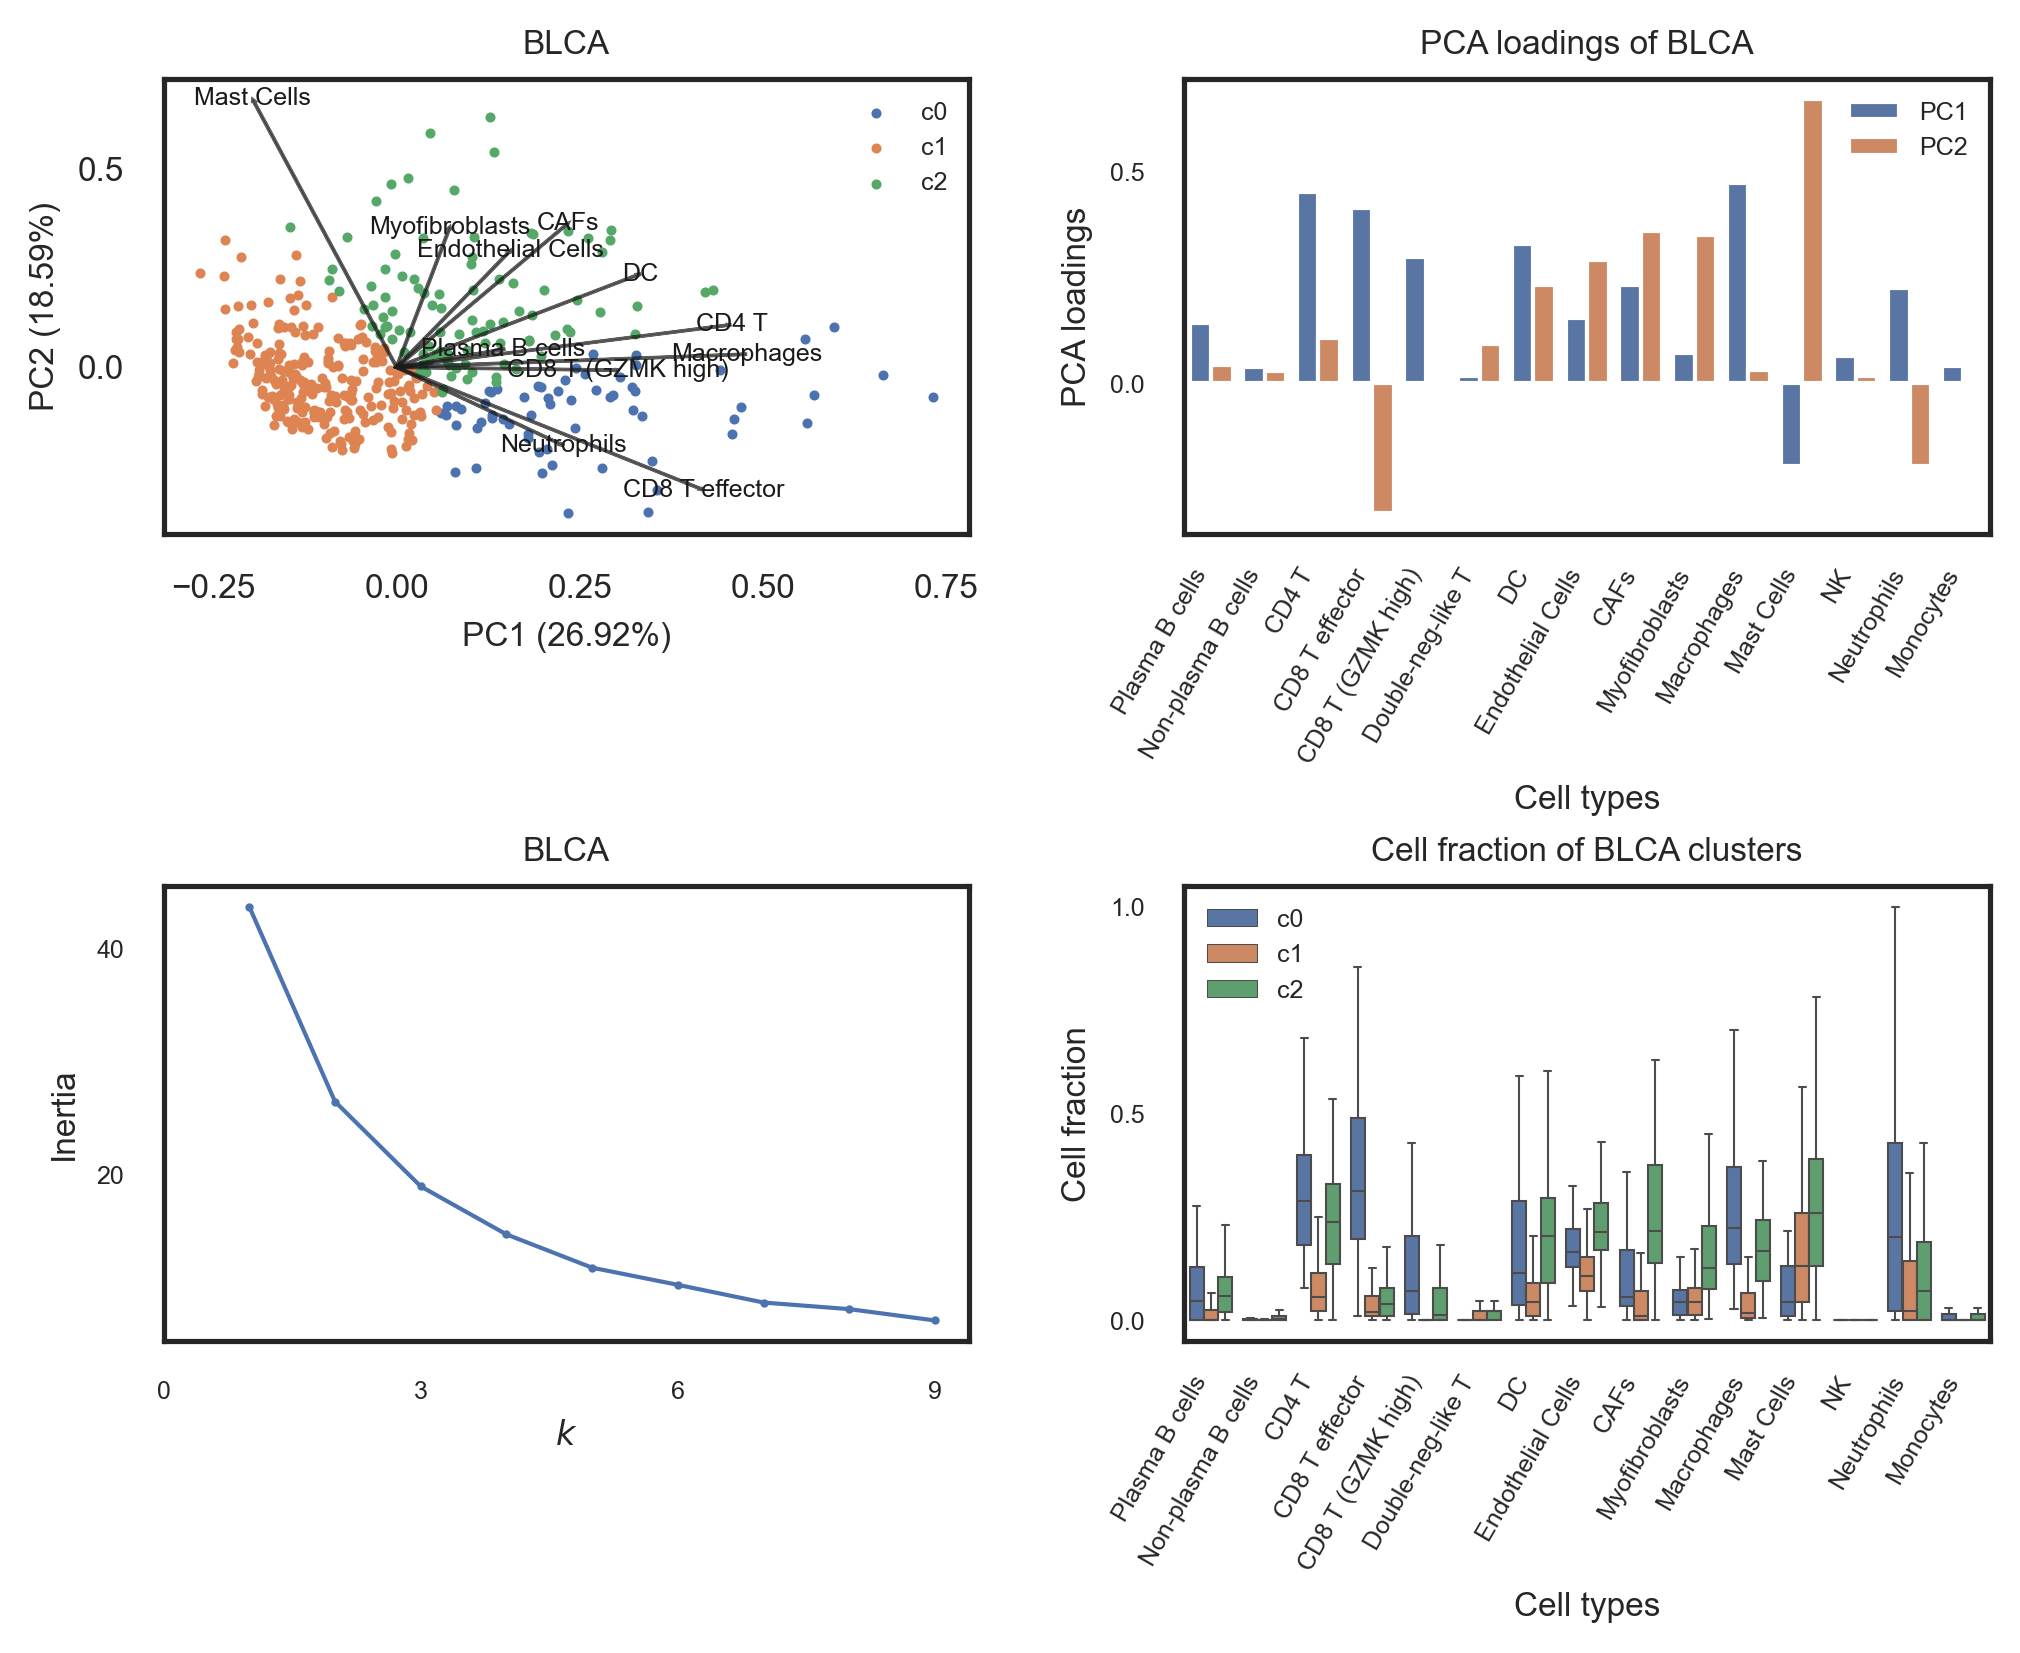

In [47]:
#reduce the data to 2 dimensions using PCA
sns.set_style("white")
mpl.rcParams['font.family'] = 'Arial'
# fig,ax = plt.subplots(2,2,figsize=(5,5))   # ,sharex=True, sharey=True
fig,ax = plt.subplots(2,2,figsize=(7,5))
plt.subplots_adjust(hspace=0.7,wspace=0.05)  # wspace=0.25,

save_path = r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\all_results\2023\PCA_survival\wenzhan\survival_shan\BLCA'
ncluster=3
count_index=0
count_double_p=0
count_except = 0
count_loadings=0
p_df = pd.DataFrame([])
significant_logrank_cox_p = pd.DataFrame([])
variance_df = pd.DataFrame([])
sub_num1=0
list_a = [1,0,0,1] #[1,0,2]#[0,1,0,1]   #行[1,0,0,1]   [0,1,2]
list_b = [0,0,1,1]#[0,0,0]#[0,1,0,1]   #列[0,0,1,1]   [0,0,0]
    

for dataset_name in beter_pre_list:
    out_p_list ={}  
    out_cox_p ={}
    out_HR = {}
#         save_path = r'.//results//PCA'
#         save_path = r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\all_results\2023\PCA_survival\1218_12celltype_scale_2pca_3cluster_minibatchkmeans'
    make_path(save_path)
    print(dataset_name,'********************************************')
    X = my_datasets[dataset_name]     #  ori_datasets   my_datasets
    #pca 降维到3维
    X_PCA = decomposition.PCA(n_components=2)
    X_PCA_data = X_PCA.fit_transform(X)

    #聚类
    #kmeans
    kmeans = MiniBatchKMeans(n_clusters=ncluster,
                              random_state=0,
                              batch_size=6,
                              max_iter=10
                              ).fit(X_PCA_data)
#     kmeans = KMeans(n_clusters=3,
#                               random_state=0,

# #                               batch_size=6,
# #                               max_iter=10
#                               ).fit(X_PCA_data)

    #PCA
    X_PCA_data = pd.DataFrame(X_PCA_data,index= X.index)
#     X_PCA_data['label'] = kmeans.labels_
    #保存loadings

    loading = pd.DataFrame(X_PCA.components_.T, columns=['PC1', 'PC2'])
    #scale
    loading['PC1_scale']= loading['PC1']/(loading['PC1'].sum())
    loading['PC2_scale']= loading['PC2']/(loading['PC2'].sum())
#     loading['PC3_scale']= loading['PC3']/(loading['PC3'].sum())
    loading['cell type'] = X.columns
    loading['cancer type'] = dataset_name

    #plot barplot
    
    loading_fig_path = os.path.join(save_path,'loadings_fig')
    make_path(loading_fig_path)
    loading_bar_path = os.path.join(loading_fig_path,f'{dataset_name}_loading_bar.png')
#     plt.sca(ax[list_a[sub_num1]])
    
    loadings_bar_2pca(loading = loading,cancer_type = dataset_name,n_PC=2,ax=ax[list_b[sub_num1],list_a[sub_num1]],pintu=True,save=False) #,save_path=loading_bar_path
    sub_num1 += 1
    #
    if count_loadings==0:
        loading_ = loading
    else:
        loading_ = pd.concat([loading_,loading],axis=0)

    #保存 variance_df

    variance_df.loc[dataset_name,'PC1'] = X_PCA.explained_variance_ratio_[0]
    variance_df.loc[dataset_name,'PC2'] = X_PCA.explained_variance_ratio_[1]
#     variance_df.loc[dataset_name,'PC3'] = X_PCA.explained_variance_ratio_[2]


    count_loadings+=1
    #降维画图
     #pca
    labels = kmeans.labels_
    variable = cf_.columns
    variance = X_PCA.explained_variance_ratio_
    save_path0 = os.path.join(save_path,'pca_2d')
    make_path(save_path0)
    save_path1 = os.path.join(save_path0,f'{dataset_name}_2d.png')

    biplot( reduced_data= X_PCA_data, labels=labels, pc=X_PCA.components_, variable=variable,variance=variance,cancertype=dataset_name,ax=ax[list_b[sub_num1],list_a[sub_num1]],pintu=True,save_path=None,save=False)
    sub_num1+=1
    #找cluster 数目
    save_path_SSE = os.path.join(save_path,'SSE_find_cluster_number')
    make_path(save_path_SSE)
    save_path_SSE = os.path.join(save_path_SSE,f'{dataset_name}.png')
    SSE_find_cluster_number(X_PCA_data=X_PCA_data,cancer_type=dataset_name,ax=ax[list_b[sub_num1],list_a[sub_num1]],pintu=True,save_path=None,save=False)  
    sub_num1+=1
    
    #pca_value
    save_path1 = os.path.join(save_path0,f'{dataset_name}_pca_values.png')
    boxplot_pca_values(X_PCA_data=X_PCA_data,labels=labels,cancer_type=dataset_name,n_pc=2,save_path=save_path1)
    #pca_sum
    save_path1 = os.path.join(save_path0,f'{dataset_name}_variance.png')
    cumsum_variance(X,save_path= save_path1)
    ##细胞比例画图
    save_path0 = os.path.join(save_path,'cell_fraction')
    make_path(save_path0)
    save_path0 = os.path.join(save_path0,f'{dataset_name}')
    boxplot_cellfracton(data=X,labels=labels,cancer_type=dataset_name,ax=ax[list_b[sub_num1],list_a[sub_num1]],pintu=True,save_path=None,save=False)
    sub_num1+=1
    if sub_num1==4:
        all_save_path = os.path.join(save_path,'Fig.SII_0115.pdf')
        plt.savefig(all_save_path,bbox_inches = 'tight')
 








## plot supplement fig.S10 (part 2)

### survival information

In [49]:

target_keys_use=[
 ('BLCA', 2,('c0','c1')),
('BLCA', 3,('c0','c2')),
    ('BLCA', 4,('c2','c3'))   #('c2','c3')  ('c1','c3')
    
 ]

BLCA ********************************************
The following patients were missing in original clinical data:['TCGA-K4-A4AB', 'TCGA-CF-A9FH', 'TCGA-UY-A8OC']
Now,There are 299 sample 
The following patients were missing in original clinical data:['TCGA-GC-A6I3', 'TCGA-GC-A6I1', 'TCGA-GV-A3QG', 'TCGA-GD-A76B']
Now,There are 102 sample 


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(w

----------------------------x_left, x_right---------------------------------------
-200.0 7000.0
aaaaaaaaaaaaaaaaaa
BLCA ********************************************
The following patients were missing in original clinical data:['TCGA-GC-A6I3', 'TCGA-GC-A6I1']
Now,There are 60 sample 
The following patients were missing in original clinical data:['TCGA-K4-A4AB', 'TCGA-CF-A9FH', 'TCGA-UY-A8OC']
Now,There are 246 sample 
The following patients were missing in original clinical data:['TCGA-GV-A3QG', 'TCGA-GD-A76B']
Now,There are 95 sample 


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(w

----------------------------x_left, x_right---------------------------------------
-200.0 7000.0
aaaaaaaaaaaaaaaaaa
BLCA ********************************************
The following patients were missing in original clinical data:['TCGA-K4-A4AB']
Now,There are 132 sample 
The following patients were missing in original clinical data:['TCGA-CF-A9FH', 'TCGA-UY-A8OC']
Now,There are 135 sample 
The following patients were missing in original clinical data:['TCGA-GC-A6I3', 'TCGA-GC-A6I1']
Now,There are 51 sample 
The following patients were missing in original clinical data:['TCGA-GV-A3QG', 'TCGA-GD-A76B']
Now,There are 83 sample 


D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\software\Miniconda\miniConda\envs\plot\lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarn

----------------------------x_left, x_right---------------------------------------
-200.0 7000.0
aaaaaaaaaaaaaaaaaa
bbbbbbbbbbbbbb


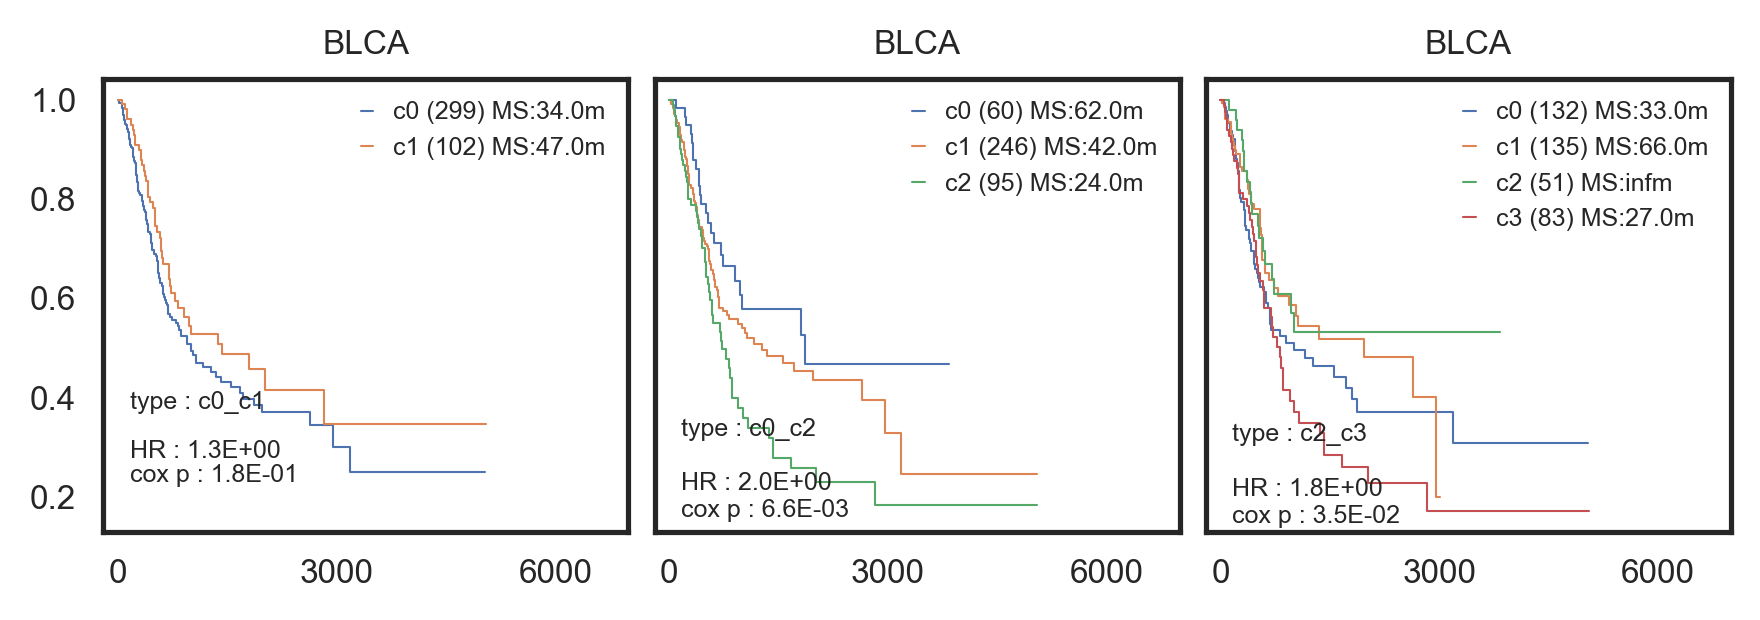

In [52]:
#拼图,分4组     包含HR
#注，先画拼图再画单个的（上面的代码），以免有些数据弄混
#需要改的sub_num                       plt.subplots


#从两个细胞类型分成4组

mpl.rcParams['font.family'] = 'Arial'
sub_num = 0    #sub_num = 0  3  6   #改target_keys_use
# set_fig_style(font_family='Arial', font_size=8)
# fig,ax = plt.subplots(1,4,figsize=(7,1.75),sharex=True, sharey=True)   #,sharey= True
#fig,ax = plt.subplots(3,3,figsize=(7,7.5),sharex=True, sharey=True)   #,sharey= True
fig,ax = plt.subplots(1,3,figsize=(7,2),sharex=True, sharey=True)   #,sharey= True
plt.subplots_adjust(hspace=0.2,wspace=0.05)  # wspace=0.25,

for tk in target_keys_use:
#     save_path = r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\all_results\0622_4group'
#     save_path = r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\all_results\0908_4group_use_new_deside_results'
    save_path = r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\all_results\2023\PCA_survival\wenzhan\survival_shan\BLCA'
    make_path(save_path)
    out_p_list ={}
    out_cox_p ={}
    out_HR = {}
    dataset_name = tk[0]
    print(dataset_name,'********************************************')

    target_datasets=my_datasets    #  ori_datasets   my_datasets
    
    X = target_datasets[dataset_name]
    #改细胞类型的名字
    X = X.rename(columns={'Endothelial Cells':'Endo','Fibroblasts':'Fb','Macrophages':'mø','CD8 T':'C8','B Cells':'B',
                         'Non-plasma B cells':'Non-plasma B','Myofibroblasts':'MyoFb','Neutrophils':'Neut','Plasma B cells':'Plasma B'})
    
    
  
    #pca 降维到3维
    X_PCA = decomposition.PCA(n_components=2)
    X_PCA_data = X_PCA.fit_transform(X)

    #聚类
    #kmeans
    kmeans = MiniBatchKMeans(n_clusters=tk[1],
                              random_state=0,
                              batch_size=6,
                              max_iter=10
                              ).fit(X_PCA_data)
#     kmeans = KMeans(n_clusters=3,
#                               random_state=0,

# #                               batch_size=6,
# #                               max_iter=10
#                               ).fit(X_PCA_data)

    #PCA
    X_PCA_data = pd.DataFrame(X_PCA_data,index= X.index)
    labels = kmeans.labels_
    p_df = pd.DataFrame()
    count_index = 0

    
    
    zip_cluster={}
    for n in range(tk[1]):
        cluster_n = X_PCA_data.loc[labels==n,:]
        cluster_n = delet_miss_in_clinical(cluster_n)
        cluster_name = 'c'+str(n)
        zip_cluster[cluster_name] = cluster_n

    list_vital_status=[]
    list_min_T_C=[]
    list_group=[]
    list_group_c =[]
    for n in range(tk[1]): 
        cluster_name = 'c'+str(n)

        list_vital_status_n = list(zip_cluster[cluster_name]['vital_status'])
        list_vital_status = list_vital_status+list_vital_status_n
        list_min_T_C_n = list(zip_cluster[cluster_name]['min(T,C)'])
        list_min_T_C = list_min_T_C+list_min_T_C_n
        list_group_n1 = [cluster_name]*len(zip_cluster[cluster_name]['min(T,C)'])
        list_group = list_group+list_group_n1
        list_group_c_n = [n]*len(zip_cluster[cluster_name]['min(T,C)']) 
        list_group_c = list_group_c+list_group_c_n
    list_vital_status_array = np.array(list_vital_status)
    list_min_T_C_array = np.array(list_min_T_C)
    list_group_array = np.array(list_group)
    single_p = pd.DataFrame()
    list_cluster = list(zip_cluster.keys())
    #拼图

    list_a = [0,1,2]
    list_b = [0,0,0]
    
    com5=combinations(list_cluster, 2)
    for key_a,key_b in com5:
        pass
    
    key_a = tk[2][0]
    key_b = tk[2][1]



                   #hr()


    k_a_n = key_a
    k_a = 2
    k_b_n = key_b
    k_b = 1

    df_a = zip_cluster[k_a_n]
    df_a['group'] = k_a
    df_b = zip_cluster[k_b_n]
    df_b['group'] = k_b    
    df_ab = pd.concat([df_a,df_b],join='inner',axis=0)
    df_ab = df_ab[['min(T,C)','vital_status','group']]

    cph = CoxPHFitter()
    cph.fit(df_ab, duration_col='min(T,C)', event_col ='vital_status')
    HR = cph.hazard_ratios_[0]
    summary_  = cph.summary
    cox_p_lable = summary_['p'][0] 

    if HR<1:
        HR= 1/HR
    #logrank p
    T1 = list_min_T_C_array[list_group_array==key_a]
    T2 = list_min_T_C_array[list_group_array==key_b]
    E1 = list_vital_status_array[list_group_array==key_a]
    E2 = list_vital_status_array[list_group_array==key_b]
    if (T1.shape[0]!=0)&(T2.shape[0]!=0):

        results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
        s_logrank_p = results.p_value
       #
    if (results.p_value<=0.05)&(cox_p_lable<=0.05):

        count_double_p +=1
        assemble = (key_a,key_b)
        out_p_list[assemble]=np.round(results.p_value,2)
        out_cox_p[assemble]=np.round(cox_p_lable,2)
        out_HR[assemble]= np.round(HR,1)


    sub_num += 1
    sub_num1 =sub_num-1
    clu_count = 0
    for clu_name,clu_data in zip_cluster.items():
#             print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',clu_data['min(T,C)'].shape[0])

        if (clu_data['min(T,C)'].shape[0]!=0)&(clu_data['vital_status'].shape[0]!=0):

            #用于图例的词条
            legend_label=clu_name

            plt.sca(ax[list_a[sub_num1]])    #ax[list_b[sub_num1],list_a[sub_num1]]
            kmf = KaplanMeierFitter()
            kmf.fit(clu_data['min(T,C)'], clu_data['vital_status'], label=f"{legend_label} ({len(clu_data['min(T,C)'])})")  #label=f"{legend_label} (n={len(clu_data['min(T,C)'])})"   
            median_ = np.round((kmf.median_survival_time_)/30,0  )   #中位生存时间
            kmf = KaplanMeierFitter()
            kmf.fit(clu_data['min(T,C)'], clu_data['vital_status'], label=f"{legend_label} ({len(clu_data['min(T,C)'])}) MS:{median_}m")  #label=f"{legend_label} (n={len(clu_data['min(T,C)'])})"   
            kmf.plot(ci_show=False,show_censors=False,linewidth=0.5,ax=ax[list_a[sub_num1]])  #ax=ax[list_b[sub_num1],list_a[sub_num1]]
            ax[list_a[sub_num1]].legend(frameon=False,fontsize=6,handlelength=0.5,loc='upper right' )   #fontsize=3.5  改成5 ax=ax[list_b[sub_num1],list_a[sub_num1]]
            ax[list_a[sub_num1]].set_xlabel('')   #ax=ax[list_b[sub_num1],list_a[sub_num1]]
#                         ax[list_b[sub_num1],list_a[sub_num1]].set_yticks([0.0, 0.3,0.7,1.0])    #只有一组需要
#                         if sub_num1==0 :
#                             ax[list_b[sub_num1],list_a[sub_num1]].set_yticks([0.0, 0.3,0.7,1.0])   #([0.2, 0.6,0.8,1.0])
#                         median_ = kmf.median_survival_time_     #中位生存时间
#                         df_survival_function = kmf.survival_function_
#                         sub_median_data[clu_name] = median_
#                         sub_survival_function[clu_name] = df_survival_function
#                 plt.title(f'{dataset_name}({media1_name}/{media2_name})',fontsize=8)
            plt.title(f'{dataset_name}',fontsize=8)

#                         plt.ylabel('Survival probability')
#                         plt.xlabel('Overall survival(Days)')
            statistic_result = multivariate_logrank_test(list_min_T_C, list_group, list_vital_status)     
            p_value_= np.round(statistic_result.p_value,10)                 #总体p值
#                         if dataset_name=='HNSC':
#                             ax[list_b[sub_num1],list_a[sub_num1]].set_yticks([0,0.4,0.6,0.8,1.0])




            count_index+=1
#                     plt.show()
            clu_count+=1
            if clu_count==tk[1]:

                plt.sca(ax[list_a[sub_num1]])     #  ax[list_b[sub_num1],list_a[sub_num1]]
#                         plt.xlim(-388.05, 6741.05)                 #????????????????????????????
                plt.tick_params(pad=0.5,bottom=False, top=False, left=False, right=False,labelsize=8) #
                plt.xlim(-200,7000)
                plt.xticks([0,3000,6000])
                x_left, x_right = plt.xlim()
                print('----------------------------x_left, x_right---------------------------------------')
                print(x_left, x_right)
                y_bottom, y_top = plt.ylim()
                x_coordinate = (x_right-x_left)*0.05+x_left
                y_coordinate = (y_top-y_bottom)*0.2+y_bottom
                y_coordinate_2 = (y_top-y_bottom)*0.14+y_bottom
                y_coordinate_3 = (y_top-y_bottom)*0.08+y_bottom
                y_coordinate_4 = (y_top-y_bottom)*0.02+y_bottom
#                 axes = plt.gca()
#                 axes.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
                plt.text(
                        x_coordinate,
                        y_coordinate,
                        ("type : "+f"{key_a}_{key_b}"),  #"general Log-rank "+"$\it{p}$ = "+f"{p_value_}"
#                                 transform=plt.gca().transAxes,
                        horizontalalignment="left",
                        fontsize=6
                )#fontsize=4
#                     plt.text(
#                             x_coordinate,
#                             y_coordinate_2,
#                             ("logrank p : "+f"{s_logrank_p:.1E}"),  #"general Log-rank "+"$\it{p}$ = "+f"{p_value_}"
# #                                 transform=plt.gca().transAxes,
#                             horizontalalignment="left",
#                             fontsize=6
#                 )#fontsize=4
                plt.text(
                        x_coordinate,
                        y_coordinate_3,
                        ("HR : "+f"{HR:.1E}"),  #"general Log-rank "+"$\it{p}$ = "+f"{p_value_}"
#                                 transform=plt.gca().transAxes,
                        horizontalalignment="left",
                        fontsize=6
                )#fontsize=4
                plt.text(
                        x_coordinate,
                        y_coordinate_4,
                        ("cox p : "+f"{cox_p_lable:.1E}"),  #"general Log-rank "+"$\it{p}$ = "+f"{p_value_}"
#                                 transform=plt.gca().transAxes,
                        horizontalalignment="left",
                        fontsize=6
                )#fontsize=4
#                         plt.show()
                print('aaaaaaaaaaaaaaaaaa')
#                         plt.show()

    if sub_num1==2:    # 2,5,7       #if sub_num1==6(少一个图)  3

        print('bbbbbbbbbbbbbb')
#                 plt.show()
        fig.add_subplot(111,frameon=False)

        #plt.tick_params(pad=0.5,bottom=False, top=False, left=False, right=False) #labelsize=8
        plt.xlabel('Overall survival(Days)',fontsize=8)
        plt.ylabel('Survival probability',fontsize=8)
        plt.axis('off')
        p_f_path = os.path.join(save_path,'survival_SIIb2.pdf')   #放在哪里
        
        plt.savefig(p_f_path,bbox_inches = 'tight',dpi=300) 
        plt.show()



In [ ]:
# count_index=0
# count_double_p=0
# count_except = 0
# count_loadings=0
# p_df = pd.DataFrame([])
# significant_logrank_cox_p = pd.DataFrame([])
# variance_df = pd.DataFrame([])
# for dataset_name in beter_pre_list:
#     out_p_list ={}  
#     out_cox_p ={}
#     out_HR = {}

#     save_path = r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\all_results\2023\PCA_survival\1218_12celltype_3PCA_3cluster'
#     make_path(save_path)
#     print(dataset_name,'********************************************')
#     X = my_datasets[dataset_name]     #  ori_datasets: DeSide-predicted cell proportions;    my_datasets: The DeSide-predicted proportions of each cell type was normalized within the cohort.
#     #reduce the data to three dimensions using PCA
#     X_PCA = decomposition.PCA(n_components=3)
#     X_PCA_data = X_PCA.fit_transform(X)
    
    
#     #kmeans clustering
#     kmeans = MiniBatchKMeans(n_clusters=3,
#                               random_state=0,
#                               batch_size=6,
#                               max_iter=10
#                               ).fit(X_PCA_data)
#     #Sum of Squared Errors (SSE) for different clustering numbers.(inertia)
#     save_path_SSE = os.path.join(save_path,'SSE_find_cluster_number')
#     save_path_SSE = os.path.join(save_path_SSE,f'{dataset_name}.png')
#     SSE_find_cluster_number(X_PCA_data=X_PCA_data,cancer_type=dataset_name,save_path=save_path_SSE)
#     #PCA
#     X_PCA_data = pd.DataFrame(X_PCA_data,index= X.index)
# #     X_PCA_data['label'] = kmeans.labels_
#     #保存loadings
   
#     loading = pd.DataFrame(X_PCA.components_.T, columns=['PC1', 'PC2','PC3'])
#     #scale
#     loading['PC1_scale']= loading['PC1']/(loading['PC1'].sum())
#     loading['PC2_scale']= loading['PC2']/(loading['PC2'].sum())
#     loading['PC3_scale']= loading['PC3']/(loading['PC3'].sum())
#     loading['cell type'] = X.columns
#     loading['cancer type'] = dataset_name
    
#     #plot barplot
#     loading_fig_path = os.path.join(save_path,'loadings_fig')
#     make_path(loading_fig_path)
#     loading_bar_path = os.path.join(loading_fig_path,f'{dataset_name}_loading_bar.png')
#     loadings_bar(loading=loading,cancer_type=dataset_name ,save_path=loading_bar_path )
#     if count_loadings==0:
#         loading_ = loading
#     else:
#         loading_ = pd.concat([loading_,loading],axis=0)
    
#     #保存 variance_df
    
#     variance_df.loc[dataset_name,'PC1'] = X_PCA.explained_variance_ratio_[0]
#     variance_df.loc[dataset_name,'PC2'] = X_PCA.explained_variance_ratio_[1]
#     variance_df.loc[dataset_name,'PC3'] = X_PCA.explained_variance_ratio_[2]


#     count_loadings+=1
#     #降维画图
#      #pca
#     labels = kmeans.labels_
#     variable = cf_.columns
#     variance = X_PCA.explained_variance_ratio_
#     save_path0 = os.path.join(save_path,'pca_3d')
#     make_path(save_path0)
#     save_path1 = os.path.join(save_path0,f'{dataset_name}_3d.png')
#     componential_plot_static_3d(X_PCA_data, labels, X_PCA.components_, variable,variance,save_path= save_path1)
    
#     #pca_value
#     save_path1 = os.path.join(save_path0,f'{dataset_name}_pca_values.png')
#     boxplot_pca_values(X_PCA_data=X_PCA_data ,labels=labels,cancer_type=dataset_name,save_path=save_path1)
#      #pca_sum
# #     save_path1 = os.path.join(save_path0,f'{dataset_name}_variance.png')
# #     cumsum_variance(X,save_path= save_path1)
#     ##细胞比例画图
#     save_path0 = os.path.join(save_path,'cell_fraction')
#     make_path(save_path0)
#     save_path0 = os.path.join(save_path0,f'{dataset_name}')
#     boxplot_cellfracton(data=X,labels=labels,cancer_type=dataset_name,save_path=save_path0)
#     #生存曲线
#     cluster_0 = X_PCA_data.loc[labels==0,:]
#     cluster_1 = X_PCA_data.loc[labels==1,:]
#     cluster_2 = X_PCA_data.loc[labels==2,:]
#     cluster_0 = delet_miss_in_clinical(cluster_0)
#     cluster_1 = delet_miss_in_clinical(cluster_1)
#     cluster_2 = delet_miss_in_clinical(cluster_2)
#     zip_cluster  = {'cluster_0':cluster_0,'cluster_1':cluster_1,'cluster_2':cluster_2}
    
#     list_vital_status = list(cluster_0['vital_status'])+ list(cluster_1['vital_status'])+list(cluster_2['vital_status']) #用于算总的p_value
#     list_min_T_C = list(cluster_0['min(T,C)'])+ list(cluster_1['min(T,C)'])+list(cluster_2['min(T,C)'])         #用于算总的p_value
#     list_group = ['cluster_0']*len(cluster_0['min(T,C)']) + ['cluster_1']*len(cluster_1['min(T,C)']) + ['cluster_2']*len(cluster_2['min(T,C)'])    #用于算总的p_value
#     list_group_n = [0]*len(cluster_0['min(T,C)']) + [1]*len(cluster_1['min(T,C)']) + [2]*len(cluster_2['min(T,C)']) 
#     list_vital_status_array = np.array(list_vital_status)
#     list_min_T_C_array = np.array(list_min_T_C)
#     list_group_array = np.array(list_group)
#     single_p = pd.DataFrame()
#     list_cluster = ['cluster_0','cluster_1','cluster_2']    #可改
#     HR_com5 ={}

#     com5=combinations(list_cluster, 2)
#     for key_a,key_b in com5:   

#         T1 = list_min_T_C_array[list_group_array==key_a]
#         T2 = list_min_T_C_array[list_group_array==key_b]
#         E1 = list_vital_status_array[list_group_array==key_a]
#         E2 = list_vital_status_array[list_group_array==key_b]



#         ######

#         if (T1.shape[0]!=0)&(T2.shape[0]!=0):

#             results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

#             p_df.loc[str(count_index),'CancerType'] = dataset_name

#             p_df.loc[str(count_index),key_a+'_'+key_b] = f"{results.p_value:.1E}"                            #np.round(results.p_value,5)
#             #!!!!!!!!!!!!!!!!!!!!!!!
#             #calc hr



#             d_a = zip_cluster[key_a]
#             d_b = zip_cluster[key_b]
#             d_a['group']=2  #实验组，HR分数分子
#             d_b['group']=1
#             d_ab = pd.concat([d_a,d_b],axis=0,join='inner')
#             d_ab = d_ab[['min(T,C)','vital_status','group']]
#             try:
#                 cph = CoxPHFitter()
#                 cph.fit(d_ab, duration_col='min(T,C)', event_col ='vital_status')
#             except:
#                 count_except+=1
#                 cph = CoxPHFitter(penalizer=0.1)
#                 cph.fit(d_ab, duration_col='min(T,C)', event_col ='vital_status')                

#             summary_  = cph.summary
#             cox_p_lable = summary_['p'][0]  

#             if cph.hazard_ratios_[0]<1:   #cph.hazard_ratios_[0]<1，则'L' 是better 的组
#                 hr_larger_than_1 = 1/cph.hazard_ratios_[0]
#                 # if threshold_p:
#                 #     info_df.loc[count_ct,'HR'] = hr_larger_than_1
#                 #     info_df.loc[count_ct,'cox_p'] = cox_p_lable

#             else:
#                 hr_larger_than_1 = cph.hazard_ratios_[0]
#                 # if threshold_p:
#                 #     info_df.loc[count_ct,'HR'] =cph.hazard_ratios_[0]
#                 #     info_df.loc[count_ct,'cox_p'] = cox_p_lable




#             #!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#             if (results.p_value<=0.05)&(cox_p_lable<=0.05):

#                 count_double_p +=1
#                 assemble = (key_a,key_b)
#                 out_p_list[assemble]=np.round(results.p_value,2)
#                 out_cox_p[assemble]=np.round(cox_p_lable,2)
#                 out_HR[assemble]= np.round(hr_larger_than_1,1)
#                 # out_p_list.append(assemble)
#                 significant_logrank_cox_p.loc[count_double_p,'Cancer type']= dataset_name
# #                 significant_logrank_cox_p.loc[count_double_p,'Cell type']=ct_list[0]+'_'+ct_list[1]

#                 significant_logrank_cox_p.loc[count_double_p,'subgroup']=key_a+'_'+key_b
#                 significant_logrank_cox_p.loc[count_double_p,'logrank p']=results.p_value
#                 significant_logrank_cox_p.loc[count_double_p,'HR']=hr_larger_than_1
#                 significant_logrank_cox_p.loc[count_double_p,'cox_p']=cox_p_lable
#             single_p.loc[str(key_a),str(key_b)] = results.p_value
#         else:
#             hr_larger_than_1 = float('-inf')
#         HR_com5[key_a+'_'+key_b] = hr_larger_than_1

#     hr_order1=sorted(HR_com5.items(),key=lambda x:x[1],reverse=False)
#     hr_order = [i[0] for i in hr_order1]
#     dict_hr =dict( zip(hr_order,range(1,4)))   #6 排位最大，值最大
    
#     try:
#         for index_sig in significant_logrank_cox_p.loc[significant_logrank_cox_p['Cancer type']==dataset_name,'subgroup'].index:
#             sig_ct = significant_logrank_cox_p.loc[index_sig,'subgroup']
#             significant_logrank_cox_p.loc[index_sig,'ranking_HR']=dict_hr[sig_ct]
#     except:
#         pass


#     set_fig_style(font_family='Arial', font_size=8)
#     plt.figure(figsize=(8,8))
#     for clu_name,clu_data in zip_cluster.items():
# #             print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',clu_data['min(T,C)'].shape[0])
#         if (clu_data['min(T,C)'].shape[0]!=0)&(clu_data['vital_status'].shape[0]!=0):
#             #用于图例的词条

#             legend_label = f'{clu_name}'
#             kmf = KaplanMeierFitter()
#             kmf.fit(clu_data['min(T,C)'], clu_data['vital_status'], label=f"{legend_label} (n={len(clu_data['min(T,C)'])})")  #str(len(sub_clinical['min(T,C)'])) #data_race['min(T,C)'][[0,1,2,4]]   
#             kmf.plot(ci_show=False,show_censors=True)  #_false_interval
#             median_ = np.round((kmf.median_survival_time_)/30,2)     #中位生存时间
            
# #             median_s_t.loc[dataset_name,clu_name] = median_  ######

#             df_survival_function = kmf.survival_function_
# #             sub_median_data[clu_name] = median_
# #             sub_survival_function[clu_name] = df_survival_function
#             plt.title(f'{dataset_name}')
#             plt.ylabel('Survival probability')
#             plt.xlabel('Overall survival(Days)')
#             statistic_result = multivariate_logrank_test(list_min_T_C, list_group, list_vital_status)     
#             p_value_= np.round(statistic_result.p_value,5)                 #总体p值

#             p_df.loc[str(count_index),'general_p_value'] = p_value_

# #                 plt.text(
# #                         0.99,
# #                         0.01,
# #                         ("general Log-rank "+"$\it{p}$ = "+f"{p_value_}"),
# #                         transform=plt.gca().transAxes,
# #                         horizontalalignment="right",
# # #                         fontsize=15
# #                     )
#             plt.text(
#                 0.01,
#                 0.31,
#                 (f"overall_log_p:{p_value_}"),
#                 transform=plt.gca().transAxes,
#                 horizontalalignment="left",
#                 fontsize=12
#             )

#             plt.text(
#                 0.01,
#                 0.21,
#                 (f"log_p:{out_p_list}"),
#                 transform=plt.gca().transAxes,
#                 horizontalalignment="left",
#                 fontsize=12
#             )

#             plt.text(
#                     0.01,
#                     0.11,
#                     (f"HR:{out_HR}"),
#                     transform=plt.gca().transAxes,
#                     horizontalalignment="left",
#                     fontsize=12
#                 ) 
#             plt.text(
#                     0.01,
#                     0.01,
#                     (f"cox_p:{out_cox_p}"),
#                     transform=plt.gca().transAxes,
#                     horizontalalignment="left",
#                     fontsize=12
#                 ) 



# #         sub_clinical_data[clu_name] = clu_data  
#     count_index+=1      
# #     clinical_data_in_celltyppe[str(ct_list)] = sub_clinical_data
# #     median_in_celltyppe[str(ct_list)] = sub_median_data
# #     survival_function_in_celltyppe[str(ct_list)] = sub_survival_function
# #     sing_p_in_celltyppe[str(ct_list)]=  single_p
# #     out_p_in_celltyppe[str(ct_list)] = out_p_list
# #     overall_p_value[str(ct_list)] = p_value_
#     survival_plot_path = os.path.join(save_path,'plot_survival_curve')   #放在哪里
#     make_path(survival_plot_path)
#     survival_path = os.path.join(survival_plot_path,f'{dataset_name}_survival.jpg')
#     plt.savefig(survival_path)  
#     plt.close()


    


# #     median_s_t_path = os.path.join(survival_plot_path,'median_survival_time.xlsx')
# #     median_s_t.to_excel(median_s_t_path)


    
# #     median_in_dataset[dataset_name]= median_in_celltyppe 
# #     survival_function_in_dataset[dataset_name] = survival_function_in_celltyppe
# #     clinical_data_all[dataset_name]= clinical_data_in_celltyppe  
# #     sing_p_in_datasets[dataset_name] = sing_p_in_celltyppe
# #     out_p_in_datasets[dataset_name] = out_p_in_celltyppe
# #     overall_p_in_datasets[dataset_name] = overall_p_value 
# p_df_path = os.path.join(survival_plot_path,f'_p_value.xlsx')
# p_df.to_excel(p_df_path)

# loading_path = os.path.join(save_path,'loadings.xlsx')
# loading_.to_excel(loading_path)


# loading_heatmap_path = os.path.join(loading_fig_path,'loading_heatmap.pdf')
# loading_heatmap(all_loading=loading_,save_path=loading_heatmap_path)


# variance_df_all = variance_df.copy()
# variance_df_all['PC_top3'] =  variance_df_all.apply(lambda x: x.sum(), axis=1) # 按行求和，添加为新列
# variance_df_all_path = os.path.join(save_path,'variance.xlsx')
# variance_df_all.to_excel(variance_df_all_path)

# significant_logrank_cox_p.loc[count_double_p,'count_except']=count_except
# significant_logrank_cox_p_path =os.path.join(save_path,'significant_logrank_cox_p.xlsx')
# significant_logrank_cox_p.to_excel(significant_logrank_cox_p_path)

    